In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking Data shape , Type and  null valuves

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
df.shape

(1338, 7)

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cheking relationship between countinues data columns(age,bmi,children) and  label(charges)

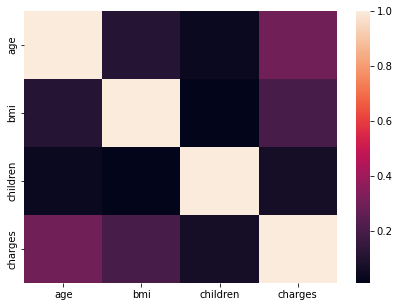

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr())
plt.show()

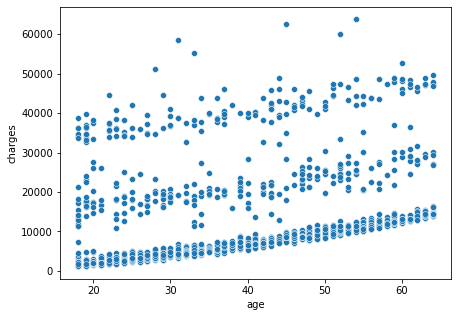

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="age",y = "charges" ,data = df)
plt.xlabel("age")
plt.ylabel("charges")
plt.show()


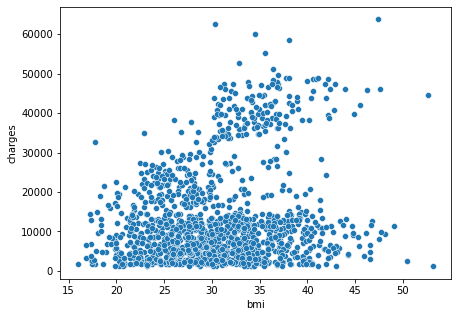

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="bmi",y = "charges" ,data = df)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

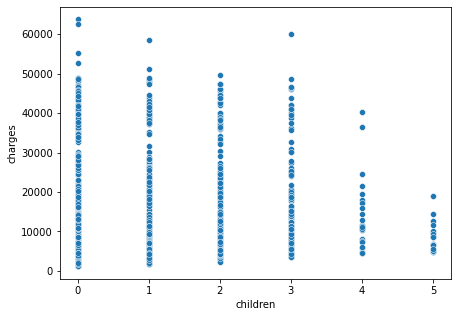

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="children",y = "charges" ,data = df)
plt.xlabel("children")
plt.ylabel("charges")
plt.show()

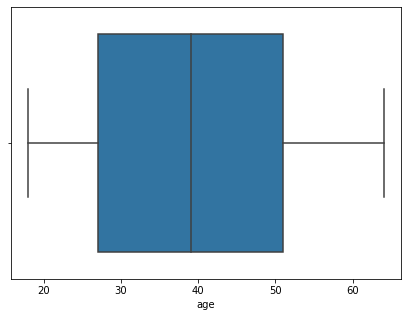

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(x= "age",data = df)
plt.show()

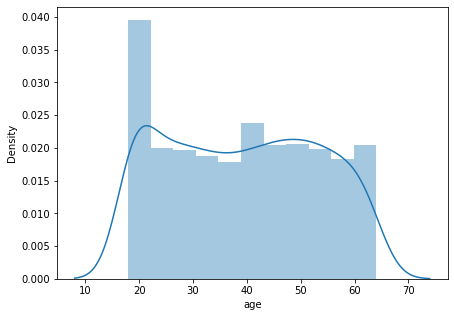

In [16]:
plt.figure(figsize=(7,5))
sns.distplot(df.age)
plt.xlabel("age")
plt.show()

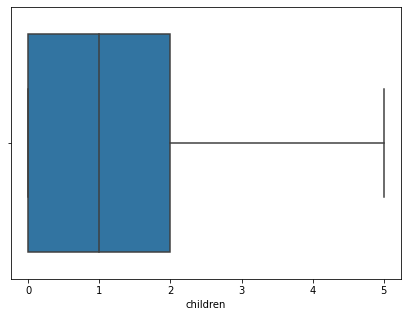

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x= "children",data = df)
plt.show()

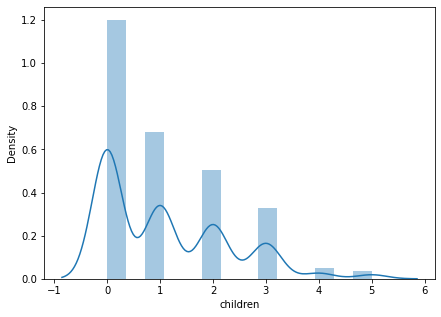

In [18]:
plt.figure(figsize=(7,5))
sns.distplot(df.children)
plt.xlabel("children")
plt.show()

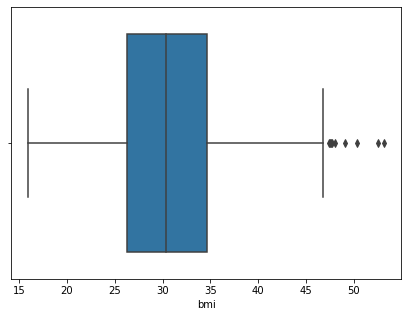

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(x= "bmi",data = df)
plt.show()

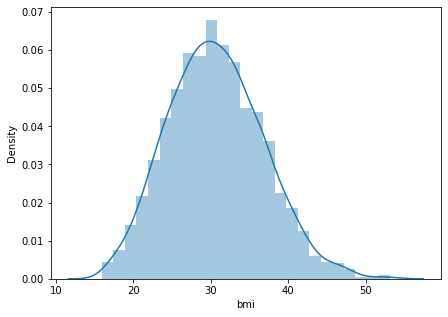

In [20]:
plt.figure(figsize=(7,5))
sns.distplot(df.bmi)
plt.xlabel("bmi")
plt.show()

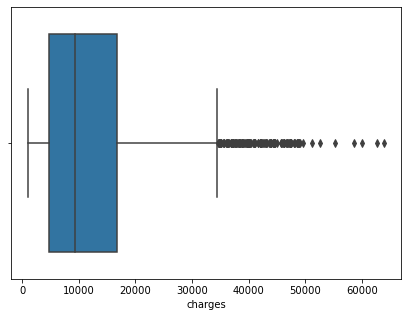

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(x= "charges",data = df)
plt.xlabel("charges")
plt.show()

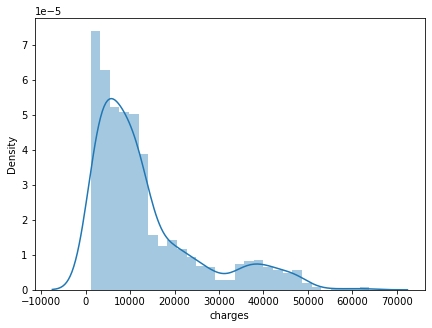

In [22]:
plt.figure(figsize=(7,5))
sns.distplot(df.charges)
plt.xlabel("charges")
plt.show()

In [23]:
from scipy.stats import zscore

In [24]:
z_score = zscore(df["bmi"])
abs_z_score = np.abs(z_score)

filtering_data = (abs_z_score < 2.3)
df = df[filtering_data]

df.describe()

,age,bmi,children,charges
count,1312.000000,1312.000000,1312.000000,1312.000000
mean,39.224085,30.374215,1.091463,13210.211310
std,14.062358,5.713918,1.205449,11969.931658
min,18.000000,16.815000,0.000000,1121.873900
25%,27.000000,26.195000,0.000000,4744.325050
50%,39.000000,30.210000,1.000000,9369.615750
75%,51.000000,34.390000,2.000000,16687.364100
max,64.000000,44.220000,5.000000,62592.873090


In [25]:
df.shape

(1312, 7)

In [26]:
((1337-1211)/1337)*100

9.424083769633508

In [27]:
#23

Categorical Features

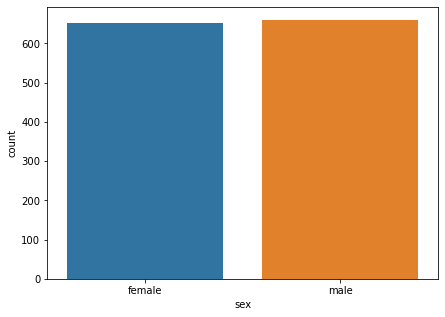

male      660
female    652
Name: sex, dtype: int64

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x="sex", data = df)
plt.xlabel("sex")
plt.show()

df.sex.value_counts()

In [29]:
df.sex = df["sex"].replace(["male","female"],[0,1])
df.sex

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1312, dtype: int64

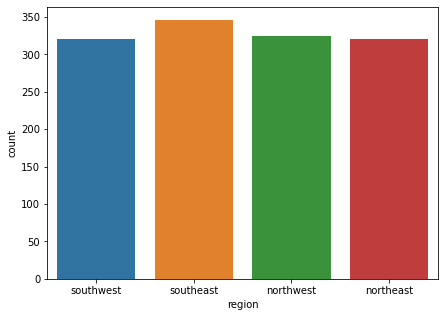

southeast    346
northwest    324
southwest    321
northeast    321
Name: region, dtype: int64

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(x="region", data = df)
plt.xlabel("region")
plt.show()

df["region"].value_counts()

In [31]:
df.region = df["region"].replace(['southeast','southwest','northwest','northeast'],[0,1,2,3])
df.region

0       1
1       0
2       0
3       2
4       2
       ..
1333    2
1334    3
1335    0
1336    1
1337    2
Name: region, Length: 1312, dtype: int64

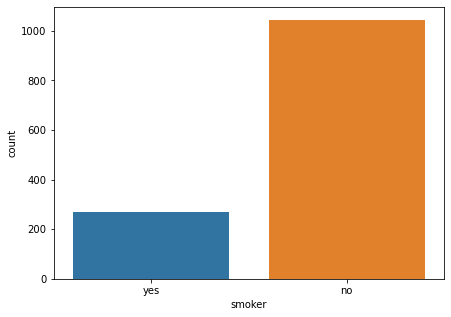

no     1044
yes     268
Name: smoker, dtype: int64

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(x="smoker", data = df)
plt.xlabel("smoker")
plt.show()

df["smoker"].value_counts()

In [33]:
df.smoker = df["smoker"].replace(["no","yes"],[0,1])
df.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1312, dtype: int64

encoding categorical columns

In [34]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,39.224085,0.496951,30.374215,1.091463,0.204268,1.472561,13210.211310
std,14.062358,0.500181,5.713918,1.205449,0.403320,1.125603,11969.931658
min,18.000000,0.000000,16.815000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.195000,0.000000,0.000000,0.000000,4744.325050
50%,39.000000,0.000000,30.210000,1.000000,0.000000,1.000000,9369.615750
75%,51.000000,1.000000,34.390000,2.000000,0.000000,2.000000,16687.364100
max,64.000000,1.000000,44.220000,5.000000,1.000000,3.000000,62592.873090


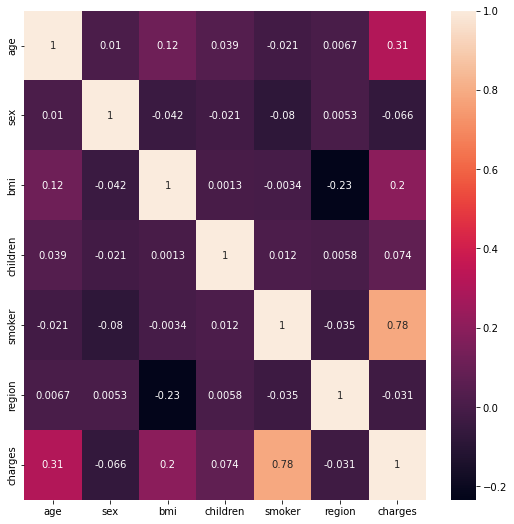

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
x = df.drop(columns=["charges"])
y = np.log(df.charges)
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [38]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=11)

# linear reg

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [42]:
regression.score(x_train,y_train)

0.7642273372003539

In [43]:
regression.score(x_test,y_test)

0.7698775820496946

In [44]:
y_pred = regression.predict(x_test)

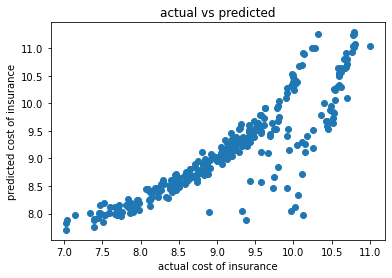

In [45]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual cost of insurance")
plt.ylabel("predicted cost of insurance")
plt.title("actual vs predicted")
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [47]:
mean_squared_error(y_test,y_pred)

0.1901073871345858

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4360130584450262

In [49]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [50]:
lassocv = LassoCV(max_iter = 100, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [51]:
alpha = lassocv.alpha_
alpha

1.9144830323894823e-05

In [52]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.9144830323894823e-05)

In [53]:
lasso_reg.score(x_test,y_test)

0.7698798717639477

In [54]:
ridgecv = RidgeCV(alphas= np.arange(0.001,0.1,0.01), normalize= True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [55]:
ridgecv.alpha_

0.001

In [56]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [57]:
ridge_model.score(x_test,y_test)

0.769877618444174

# SVR

In [58]:
from sklearn.svm import SVR
svr_reg = SVR()

In [59]:
svr_reg.fit(x_train,y_train)

SVR()

In [60]:
svr_reg.score(x_train,y_train)

0.8396962855130365

In [61]:
svr_reg.score(x_test,y_test)

0.8349073296701625

In [62]:
y_pred = svr_reg.predict(x_test)

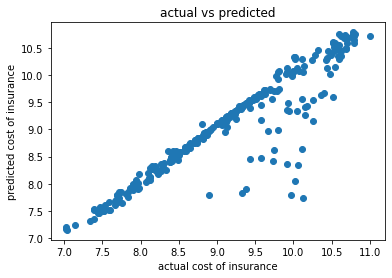

In [63]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual cost of insurance")
plt.ylabel("predicted cost of insurance")
plt.title("actual vs predicted")
plt.show()

In [64]:
mean_squared_error(y_test,y_pred)

0.13638539204926395

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.3693039291007665

In [66]:
from sklearn.metrics import r2_score

In [68]:
y_pred = svr_reg.predict(x_test)

accuracy = r2_score(y_test,y_pred)

accuracy

0.8349073296701625

# ramdon forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
forest_reg = RandomForestRegressor()

In [71]:
forest_reg.fit(x_train,y_train)
forest_reg.score(x_train,y_train)

0.9699546609833302

In [72]:
forest_reg.score(x_test,y_test)

0.8115421913906022

In [73]:
y_pred = forest_reg.predict(x_test)

In [74]:
y_pred = forest_reg.predict(x_test)

accuracy = r2_score(y_test,y_pred)

accuracy

0.8115421913906022

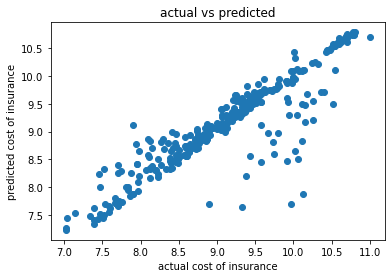

In [75]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual cost of insurance")
plt.ylabel("predicted cost of insurance")
plt.title("actual vs predicted")
plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameters = {'n_estimators' : [10,20,30],
             'criterion' : ['squared_error',"absolute_error"],
             "max_depth":[10,15,17,14],
             "min_samples_split":[10,12,13]}

grd = GridSearchCV(forest_reg,param_grid=parameters)
grd.fit(x_train,y_train)

print("best param",grd.best_params_)

best param {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_split': 13, 'n_estimators': 30}


In [78]:
forest_reg = grd.best_estimator_

forest_reg.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_split=13, n_estimators=30)

In [79]:
forest_reg.score(x_train,y_train)

0.8762011904383092

In [80]:
forest_reg.score(x_test,y_test)

0.8324141195678171

In [81]:
y_pred = forest_reg.predict(x_test)

In [82]:
y_pred = forest_reg.predict(x_test)

accuracy = r2_score(y_test,y_pred)

accuracy

0.8324141195678171

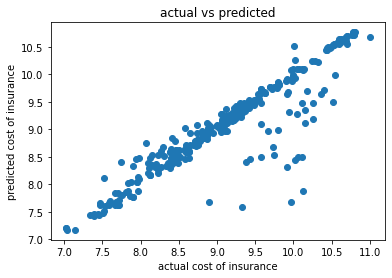

In [83]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual cost of insurance")
plt.ylabel("predicted cost of insurance")
plt.title("actual vs predicted")
plt.show()

In [84]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.37208207187294945

In [85]:
y_pred = forest_reg.predict(x_test)

accuracy = r2_score(y_test,y_pred)

accuracy

0.8324141195678171

# KNN REg

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
knn_reg = KNeighborsRegressor()

In [88]:
knn_reg.fit(x_train,y_train)
knn_reg.score(x_train,y_train)

0.8589343505223408

In [89]:
knn_reg.score(x_test,y_test)

0.8025430075258588

In [90]:
from sklearn.metrics import r2_score

In [91]:
y_pred = knn_reg.predict(x_test)

accuracy = r2_score(y_test,y_pred)

accuracy

0.8025430075258588

In [92]:
parameters = {'n_neighbors':[3,5,7,9],
             'weights':['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[10,20,25,30,45],
             'p':[1,2,3,4]}

In [93]:
grd_knn = GridSearchCV(knn_reg,param_grid=parameters)
grd_knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 25, 30, 45],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [94]:
grd_knn.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 9,
 'p': 4,
 'weights': 'uniform'}

In [95]:
knn_reg = grd_knn.best_estimator_

In [96]:
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, n_neighbors=9, p=4)

In [97]:
knn_reg.score(x_train,y_train)

0.8428173398470163

In [98]:
knn_reg.score(x_test,y_test)

0.8158587701032171

In [99]:
y_pred = knn_reg.predict(x_test)

In [100]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.3900277897320969

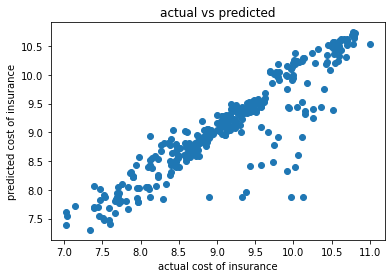

In [101]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual cost of insurance")
plt.ylabel("predicted cost of insurance")
plt.title("actual vs predicted")
plt.show()